In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from matplotlib import pyplot as plt
import sklearn

### Questão 01

In [2]:
sklearn.__version__

'0.19.1'

In [3]:
X, y = datasets.load_diabetes(return_X_y = True)

In [4]:
X.shape

(442, 10)

In [5]:
y.shape

(442,)

In [6]:
X_df = pd.DataFrame(X)

In [7]:
X_df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [8]:
y_df = pd.DataFrame(y)

In [9]:
y_df.head(10)

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
5,97.0
6,138.0
7,63.0
8,110.0
9,310.0


In [10]:
df = pd.concat([X_df,y_df],axis=1)

In [11]:
col = ['A','B','C','D','E','F','G','H','I','J','K']
df.columns = col

In [12]:
df.head(10)

,A,B,C,D,E,F,G,H,I,J,K
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [13]:
X_values = X_df.values
y_values = y_df.values

### Questão 02

In [97]:
df.corr()

,A,B,C,D,E,F,G,H,I,J,K
A,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
B,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
C,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
D,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
E,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
F,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
G,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
H,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
I,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
J,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


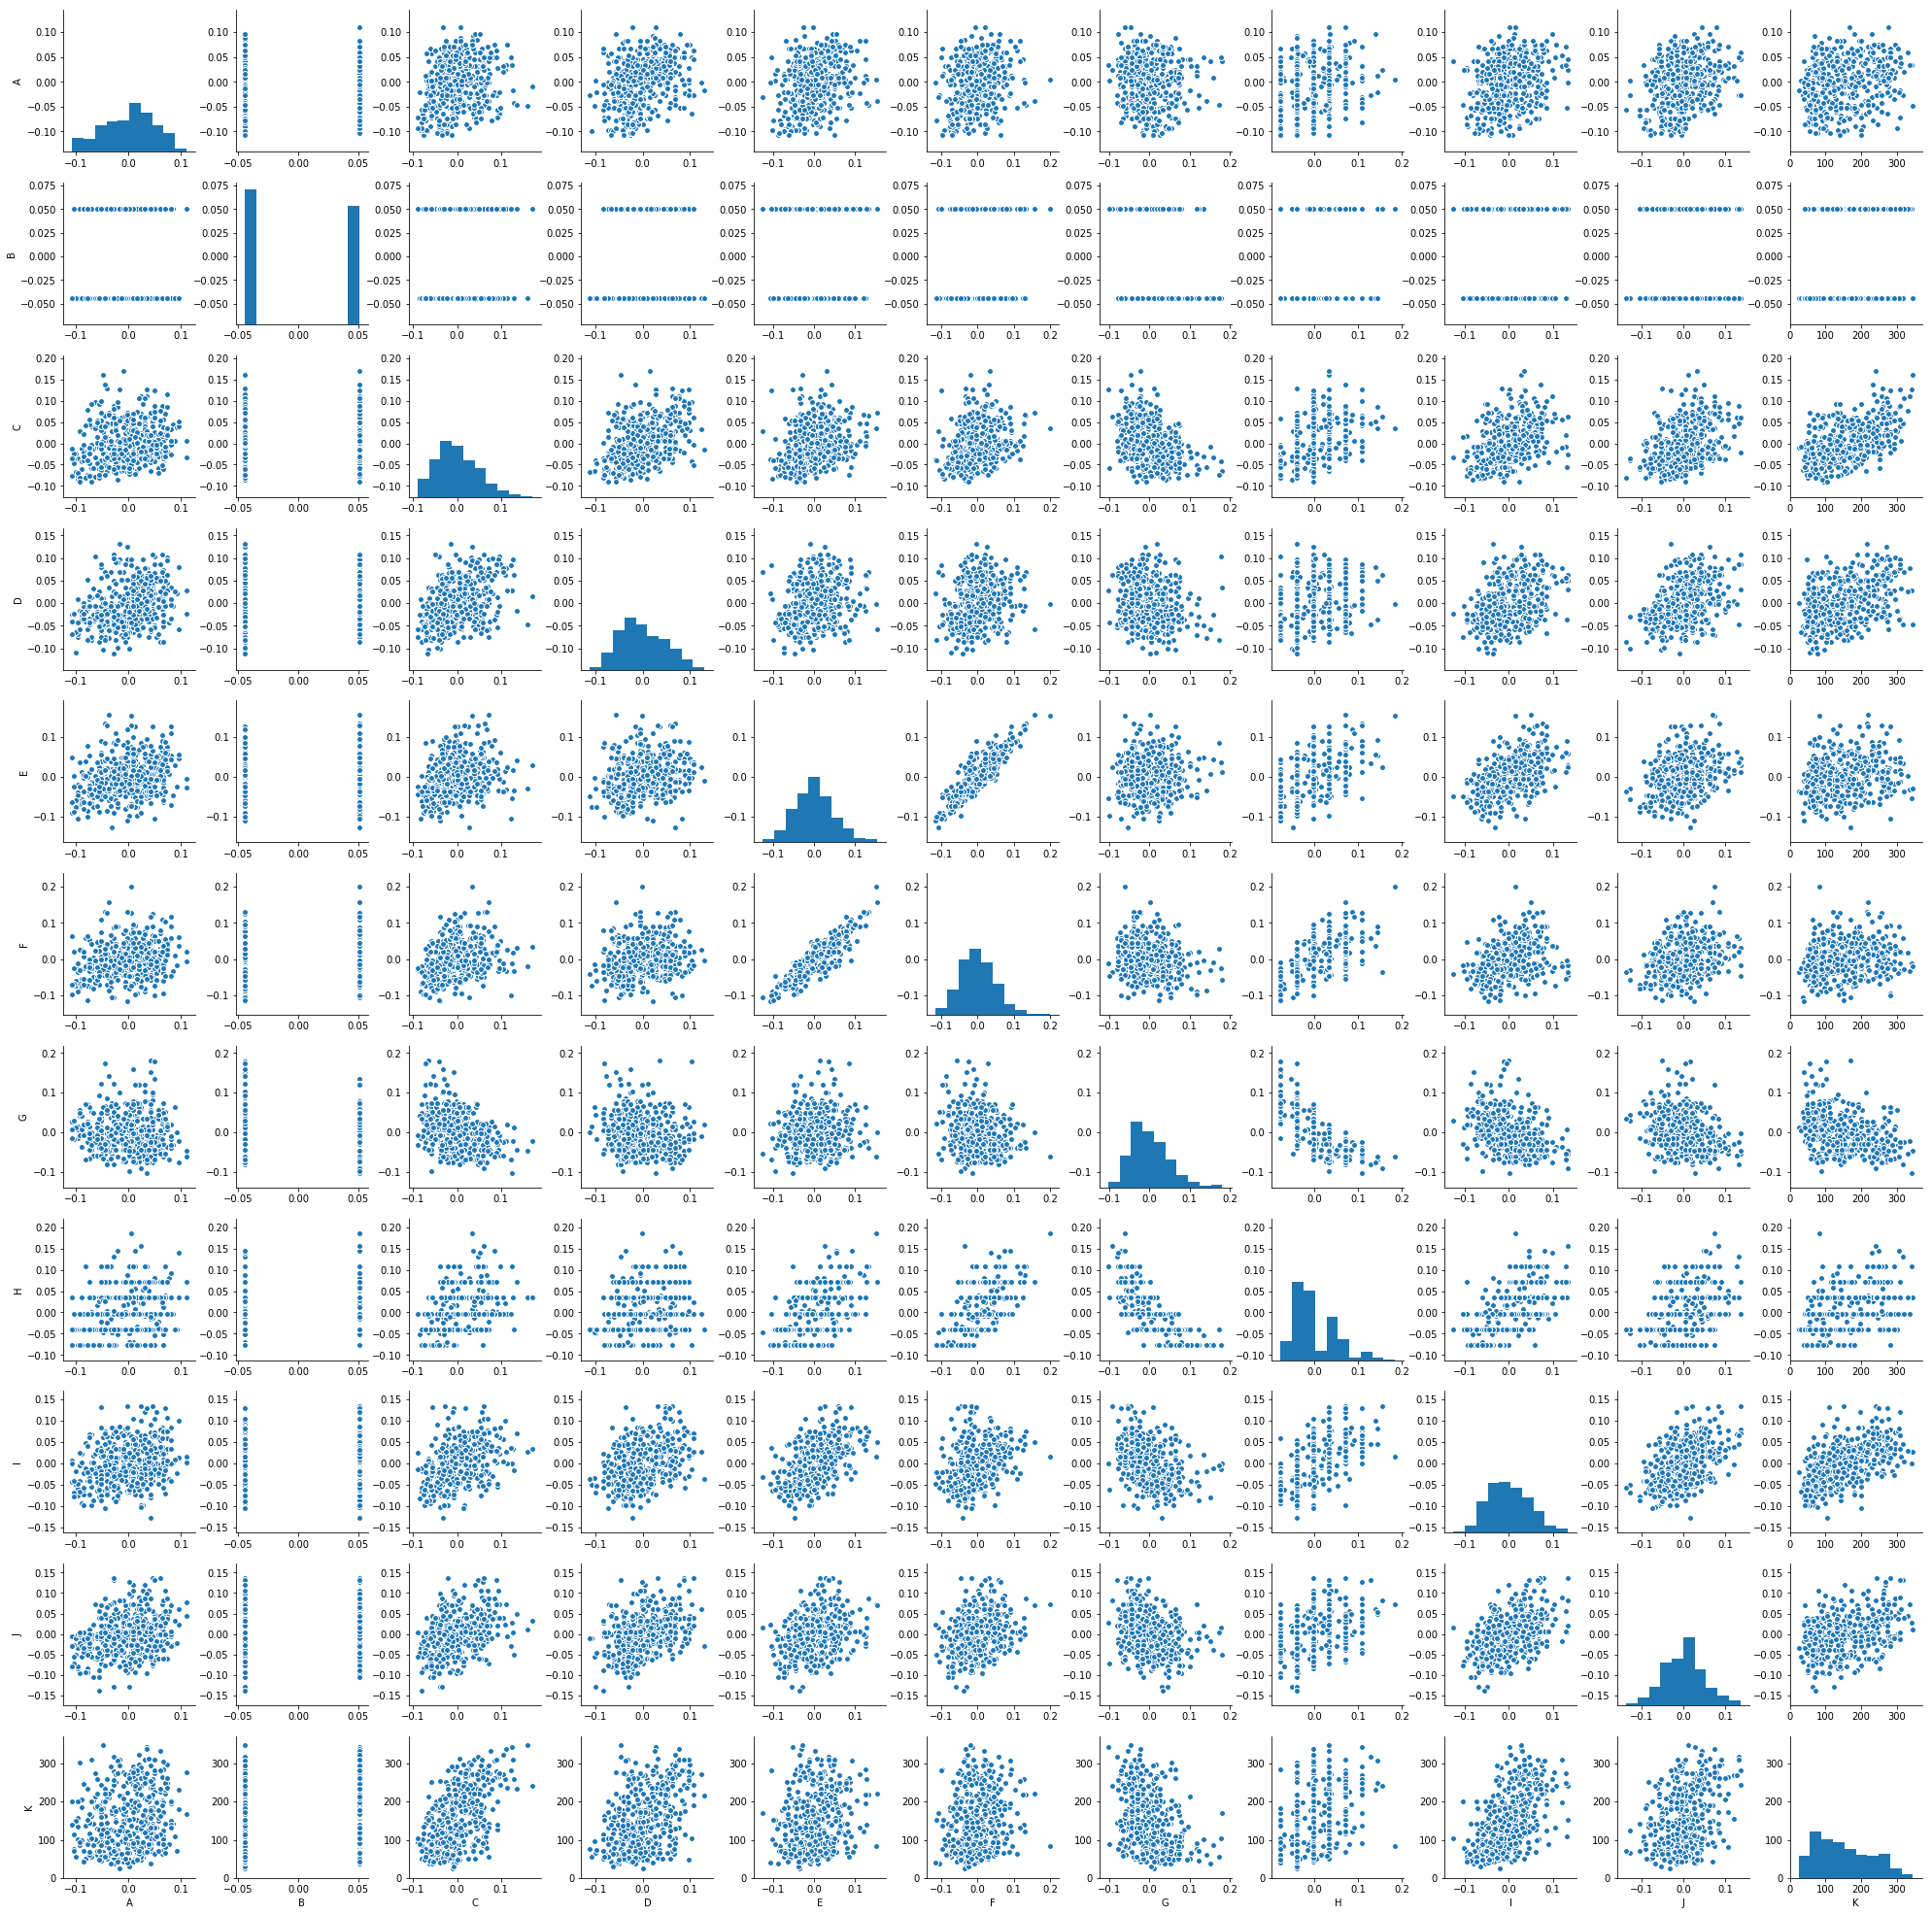

In [15]:
sns.pairplot(df)

##### Item a) A feature que mais se ajusta com um sistema é linear é a 'C', pois os pontos são mais alinhados com uma linha imaginária crescente que passaria entre os pontos, mantendo a distância dos pontos para a reta a menor possível.

##### Item b) A feature que menos se ajusta com um sistema linear é a 'A', pois os pontos são muito dispesos.

### Questão 03

In [16]:
for i in col[0:len(col)-1]:
    print('Correlação de ' + i + ' - ' + 'K: ' + str(df[i].corr(df['K'])))

Correlação de A - K: 0.187888750719
Correlação de B - K: 0.0430619984516
Correlação de C - K: 0.586450134475
Correlação de D - K: 0.441483848931
Correlação de E - K: 0.212022481015
Correlação de F - K: 0.174053586969
Correlação de G - K: -0.394789250671
Correlação de H - K: 0.430452884745
Correlação de I - K: 0.565883425243
Correlação de J - K: 0.382483484249


### Questão 04

In [17]:
model = linear_model.LinearRegression()

In [18]:
n_train = int(round(len(df) * 0.75))
X_train = X_values[:n_train,:]
y_train = y_values[:n_train]
X_test = X_values[n_train:,:]
y_test = y_values[n_train:]

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(332, 10)
(332, 1)
(110, 10)
(110, 1)


In [20]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Questão 05

In [34]:
coef = model.coef_[0]
coef

array([   2.09303999, -234.76508926,  503.77535108,  292.80872823,
       -482.63324757,  212.25146963,  -26.68286137,  138.83320436,
        652.16884123,   99.50042052])

In [25]:
model.intercept_

array([ 151.7384723])

In [51]:
var = ['','X1','X2','X3','X4','X5','X6','X7','X8','X9']
flag = False
for i in range(0,len(coef)):
    if(flag):
        print(str(coef[i]) + var[i])
    else:
        print(str(coef[i]) + ' ' + var[i] + ' +'),

2.09303999483  + -234.765089259 X1 + 503.775351078 X2 + 292.808728228 X3 + -482.633247566 X4 + 212.251469634 X5 + -26.6828613748 X6 + 138.833204365 X7 + 652.168841227 X8 + 99.5004205173 X9 +


### Questão 06

In [49]:
y_pred = model.predict(X_test)

### Questão 07

In [59]:
mse_auto = metrics.mean_squared_error(y_test,y_pred)
print(mse_auto)

2732.37176484


In [61]:
mse_manual = sum((y_test - y_pred) ** 2) / len(y_test)
print(mse_manual)

[ 2732.37176484]


### Questão 08

In [66]:
X_train.shape

(332, 10)

In [98]:
X_train_melhor = X_values[:n_train,2:3]
X_test_melhor = X_values[n_train:,2:3]

In [94]:
X_train_melhor.shape

(332, 1)

In [95]:
model_melhor = linear_model.LinearRegression()

In [96]:
model_melhor.fit(X_train_melhor,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
model_melhor.coef_

array([[ 938.93661435]])